# Experimento 6: classificação com KNN

Experimentando 30 rodadas de classificação com KNN com

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (classification_report,
                             plot_confusion_matrix,
                             confusion_matrix,
                             accuracy_score)

In [2]:
def acuracia_por_frequencia(
        frequence:np.ndarray,
        y_true:np.ndarray,
        y_pred:np.ndarray,
        rodada : int = 0
    )->pd.DataFrame:
    
    df = pd.DataFrame(
        data=[frequence, y_true, y_pred],
        index=['freq', 'true', 'pred']
        ).transpose()

    score_dict = {}

    for freq, sub_df in df.groupby('freq'):
        score_dict[f'freq_{freq}_support'] = len(sub_df)
        score_dict[f'freq_{freq}_acc'] = accuracy_score(y_true=sub_df['true'].values,
                                                        y_pred=sub_df['pred'].values)
    return pd.DataFrame(score_dict, index=[rodada])


## Carregando dados

seeds: [1988 3535 7498 7176  827 3005  155 6090 3316 1453 7899 5242  726 3605
 3493 1375 7088 3235 3354 4301 6458 3452 7653 4240 4679 1585 7596 5464
 5823  491]
Rodada: 0 - seed: 1988

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        79
        HI-1       0.93      0.97      0.95        71
        HI-2       0.99      0.97      0.98        78
        HI-3       0.99      0.97      0.98        72
        LI-1       0.96      0.94      0.95        79
        LI-2       1.00      1.00      1.00        68
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



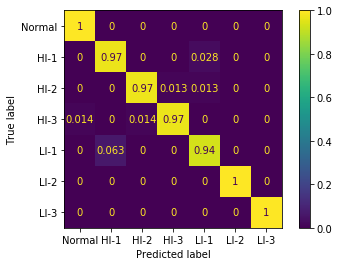

Rodada: 1 - seed: 3535

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        77
        HI-1       0.91      0.96      0.93        71
        HI-2       1.00      0.99      0.99        78
        HI-3       1.00      0.99      0.99        79
        LI-1       0.95      0.91      0.93        77
        LI-2       1.00      1.00      1.00        70
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



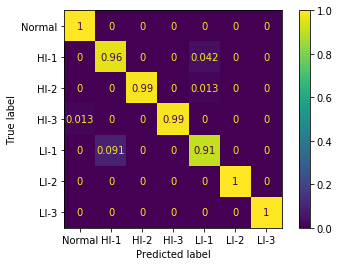

Rodada: 2 - seed: 7498

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        78
        HI-1       0.93      0.98      0.95        85
        HI-2       1.00      1.00      1.00        75
        HI-3       1.00      1.00      1.00        74
        LI-1       0.97      0.92      0.94        74
        LI-2       1.00      1.00      1.00        64
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.98      0.98      0.98       519



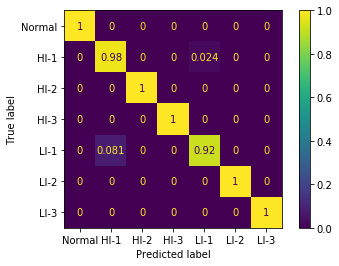

Rodada: 3 - seed: 7176

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        64
        HI-1       0.95      0.97      0.96        62
        HI-2       1.00      0.99      0.99        78
        HI-3       1.00      1.00      1.00        85
        LI-1       0.97      0.97      0.97        86
        LI-2       1.00      1.00      1.00        75
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



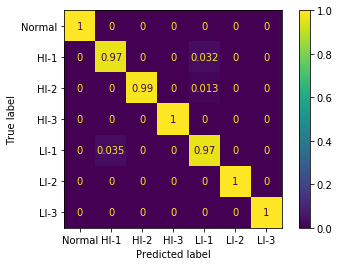

Rodada: 4 - seed: 827

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99        61
        HI-1       0.95      0.99      0.97        83
        HI-2       0.99      0.96      0.97        80
        HI-3       1.00      0.99      0.99        69
        LI-1       0.97      0.94      0.95        64
        LI-2       0.99      1.00      0.99        67
        LI-3       1.00      1.00      1.00        95

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



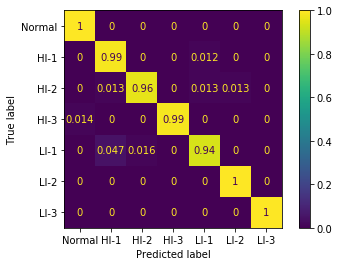

Rodada: 5 - seed: 3005

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        73
        HI-1       0.99      1.00      0.99        71
        HI-2       0.98      0.98      0.98        63
        HI-3       0.99      0.98      0.98        93
        LI-1       0.98      0.98      0.98        63
        LI-2       1.00      1.00      1.00        83
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



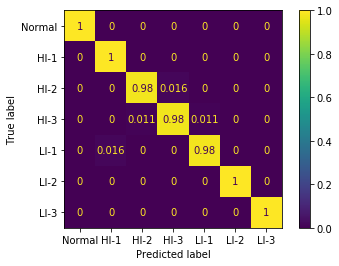

Rodada: 6 - seed: 155

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        79
        HI-1       0.99      0.91      0.94        85
        HI-2       0.97      0.98      0.98        62
        HI-3       1.00      0.97      0.99        71
        LI-1       0.86      0.98      0.92        65
        LI-2       1.00      0.99      0.99        72
        LI-3       1.00      1.00      1.00        85

    accuracy                           0.97       519
   macro avg       0.97      0.98      0.97       519
weighted avg       0.98      0.97      0.98       519



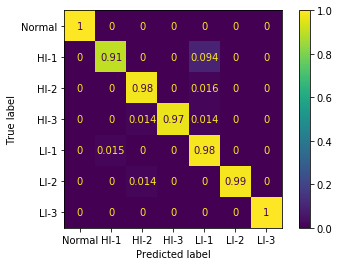

Rodada: 7 - seed: 6090

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99        59
        HI-1       0.98      0.95      0.97        87
        HI-2       1.00      0.96      0.98        80
        HI-3       0.96      0.99      0.97        72
        LI-1       0.95      0.98      0.96        84
        LI-2       1.00      1.00      1.00        74
        LI-3       1.00      1.00      1.00        63

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



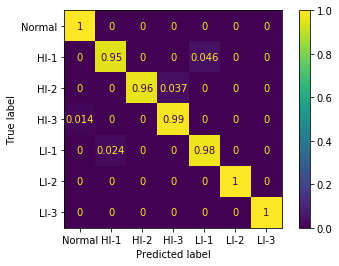

Rodada: 8 - seed: 3316

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        64
        HI-1       0.95      0.97      0.96        72
        HI-2       0.99      0.97      0.98        76
        HI-3       1.00      0.99      0.99        82
        LI-1       0.95      0.95      0.95        73
        LI-2       1.00      1.00      1.00        72
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



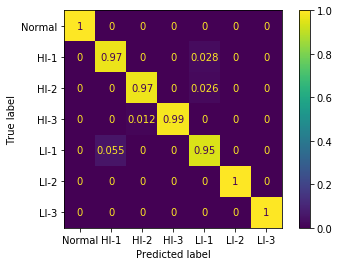

Rodada: 9 - seed: 1453

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        74
        HI-1       0.98      0.94      0.96        65
        HI-2       1.00      1.00      1.00        76
        HI-3       1.00      1.00      1.00        69
        LI-1       0.95      0.99      0.97        82
        LI-2       1.00      1.00      1.00        82
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



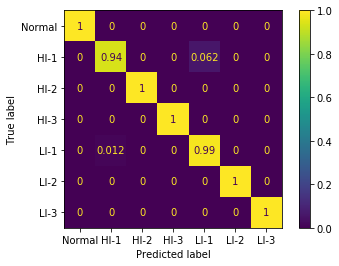

Rodada: 10 - seed: 7899

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        86
        HI-1       0.94      0.97      0.96        68
        HI-2       1.00      0.97      0.99        79
        HI-3       1.00      1.00      1.00        84
        LI-1       0.97      0.94      0.96        72
        LI-2       0.97      1.00      0.98        65
        LI-3       1.00      1.00      1.00        65

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



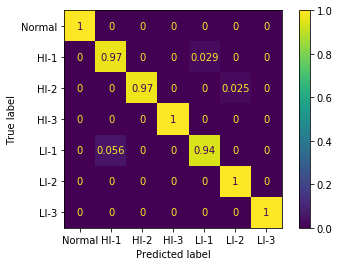

Rodada: 11 - seed: 5242

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        82
        HI-1       0.93      1.00      0.96        68
        HI-2       1.00      0.99      0.99        76
        HI-3       1.00      1.00      1.00        71
        LI-1       0.99      0.94      0.96        78
        LI-2       1.00      1.00      1.00        79
        LI-3       1.00      1.00      1.00        65

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



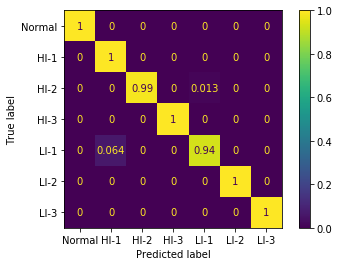

Rodada: 12 - seed: 726

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        64
        HI-1       0.92      0.99      0.95        70
        HI-2       1.00      0.99      0.99        75
        HI-3       1.00      1.00      1.00        74
        LI-1       0.99      0.95      0.97        91
        LI-2       1.00      1.00      1.00        65
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



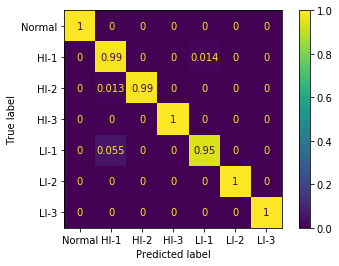

Rodada: 13 - seed: 3605

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99        67
        HI-1       0.99      0.96      0.97        92
        HI-2       0.99      0.97      0.98        68
        HI-3       1.00      0.97      0.98        94
        LI-1       0.92      1.00      0.96        59
        LI-2       1.00      1.00      1.00        71
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.98       519
   macro avg       0.98      0.99      0.98       519
weighted avg       0.98      0.98      0.98       519



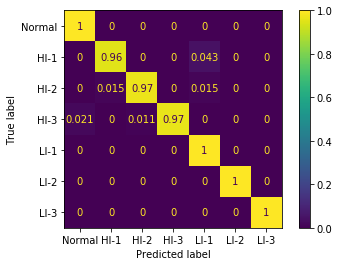

Rodada: 14 - seed: 3493

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99        57
        HI-1       0.96      0.96      0.96        78
        HI-2       0.99      0.94      0.96        85
        HI-3       1.00      0.96      0.98        72
        LI-1       0.94      0.96      0.95        76
        LI-2       0.95      1.00      0.97        78
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



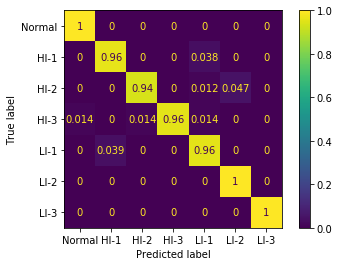

Rodada: 15 - seed: 1375

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        71
        HI-1       0.93      0.97      0.95        68
        HI-2       0.99      0.96      0.97        72
        HI-3       1.00      0.98      0.99        88
        LI-1       0.96      0.93      0.95        74
        LI-2       0.97      1.00      0.99        77
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



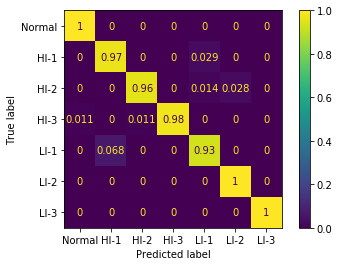

Rodada: 16 - seed: 7088

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        76
        HI-1       0.92      0.96      0.94        75
        HI-2       1.00      0.99      0.99        75
        HI-3       1.00      1.00      1.00        81
        LI-1       0.96      0.94      0.95        80
        LI-2       1.00      1.00      1.00        78
        LI-3       1.00      1.00      1.00        54

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



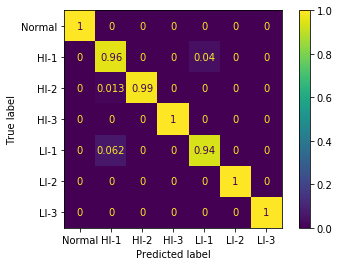

Rodada: 17 - seed: 3235

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.94      0.96      0.95        79
        HI-2       0.97      1.00      0.99        76
        HI-3       1.00      0.97      0.98        67
        LI-1       0.96      0.93      0.95        74
        LI-2       1.00      1.00      1.00        82
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



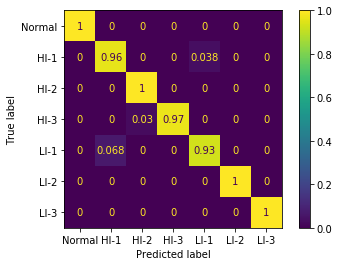

Rodada: 18 - seed: 3354

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        63
        HI-1       0.95      0.98      0.96        82
        HI-2       1.00      0.99      0.99        72
        HI-3       1.00      1.00      1.00        69
        LI-1       0.96      0.94      0.95        72
        LI-2       1.00      1.00      1.00        81
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



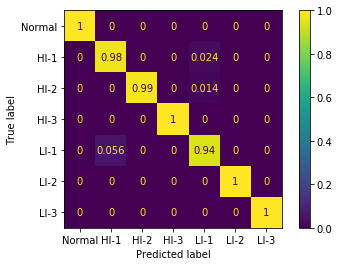

Rodada: 19 - seed: 4301

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        74
        HI-1       0.94      0.96      0.95        70
        HI-2       1.00      0.99      0.99        84
        HI-3       1.00      1.00      1.00        81
        LI-1       0.94      0.94      0.94        70
        LI-2       1.00      1.00      1.00        80
        LI-3       1.00      1.00      1.00        60

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



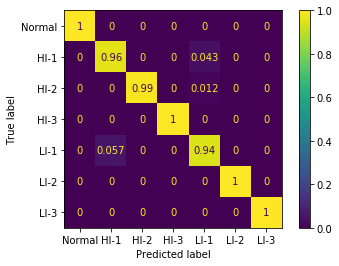

Rodada: 20 - seed: 6458

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        62
        HI-1       0.96      0.93      0.94        72
        HI-2       0.99      0.93      0.96        76
        HI-3       0.96      0.99      0.97        89
        LI-1       0.92      0.94      0.93        77
        LI-2       0.96      1.00      0.98        77
        LI-3       1.00      0.98      0.99        66

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



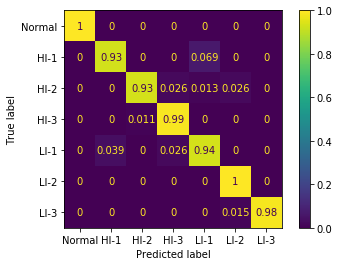

Rodada: 21 - seed: 3452

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        70
        HI-1       0.99      0.95      0.97        77
        HI-2       0.99      0.97      0.98        77
        HI-3       1.00      0.98      0.99        83
        LI-1       0.92      0.99      0.95        68
        LI-2       1.00      1.00      1.00        60
        LI-3       1.00      1.00      1.00        84

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



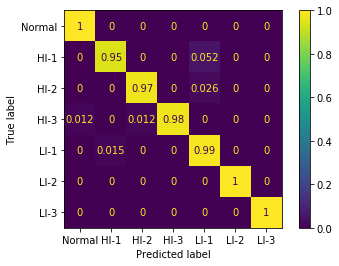

Rodada: 22 - seed: 7653

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        66
        HI-1       0.96      0.97      0.97        79
        HI-2       0.98      0.99      0.98        82
        HI-3       1.00      0.96      0.98        72
        LI-1       0.95      0.96      0.96        84
        LI-2       1.00      1.00      1.00        82
        LI-3       1.00      1.00      1.00        54

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



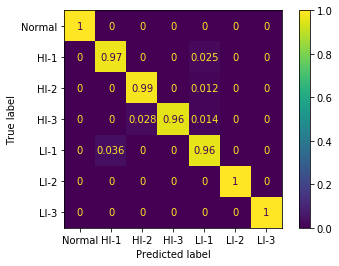

Rodada: 23 - seed: 4240

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        75
        HI-1       0.96      0.96      0.96        84
        HI-2       1.00      0.99      0.99        71
        HI-3       1.00      0.99      0.99        82
        LI-1       0.93      0.96      0.94        67
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



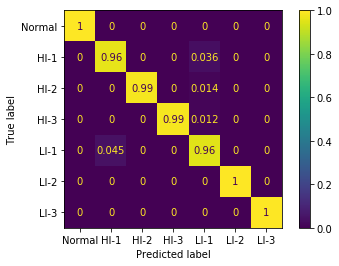

Rodada: 24 - seed: 4679

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        74
        HI-1       0.91      0.95      0.93        65
        HI-2       1.00      0.97      0.99        73
        HI-3       1.00      0.99      0.99        95
        LI-1       0.95      0.93      0.94        75
        LI-2       1.00      1.00      1.00        70
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



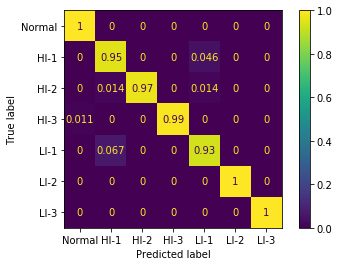

Rodada: 25 - seed: 1585

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        68
        HI-1       0.99      0.97      0.98        76
        HI-2       1.00      0.99      0.99        81
        HI-3       1.00      1.00      1.00        73
        LI-1       0.96      0.99      0.98        83
        LI-2       1.00      1.00      1.00        65
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



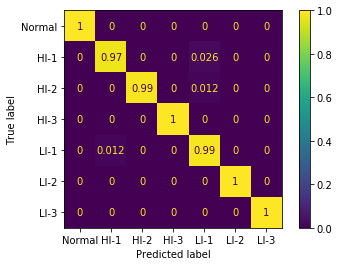

Rodada: 26 - seed: 7596

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        73
        HI-1       0.89      0.99      0.93        78
        HI-2       0.97      0.97      0.97        58
        HI-3       1.00      0.96      0.98        69
        LI-1       0.96      0.90      0.93        91
        LI-2       1.00      1.00      1.00        77
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



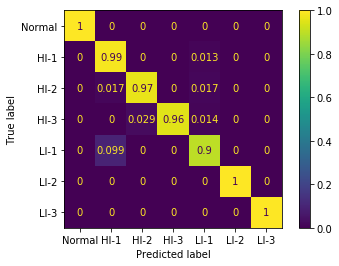

Rodada: 27 - seed: 5464

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        57
        HI-1       0.98      0.94      0.96        85
        HI-2       1.00      0.95      0.98        83
        HI-3       0.96      0.99      0.97        77
        LI-1       0.91      0.97      0.94        77
        LI-2       1.00      1.00      1.00        75
        LI-3       1.00      1.00      1.00        65

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



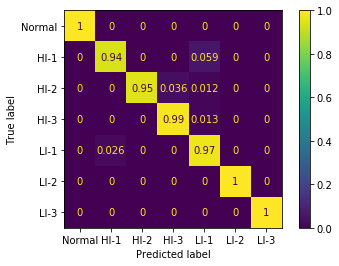

Rodada: 28 - seed: 5823

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        75
        HI-1       0.94      0.99      0.96        69
        HI-2       0.99      0.99      0.99        72
        HI-3       1.00      0.99      0.99        67
        LI-1       0.97      0.95      0.96        75
        LI-2       1.00      1.00      1.00        79
        LI-3       1.00      1.00      1.00        82

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



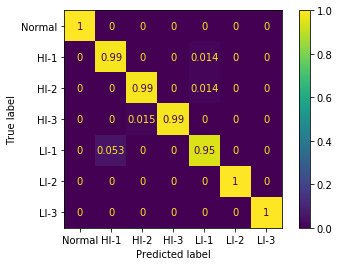

Rodada: 29 - seed: 491

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        70
        HI-1       0.94      0.96      0.95        80
        HI-2       1.00      1.00      1.00        69
        HI-3       1.00      1.00      1.00        79
        LI-1       0.96      0.93      0.95        75
        LI-2       1.00      1.00      1.00        78
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.98       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.98      0.98      0.98       519



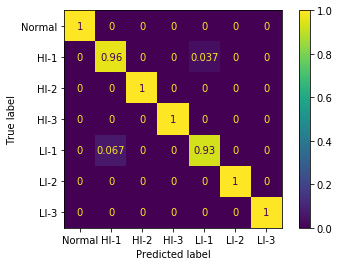

In [3]:
TARGET_LABELS = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')

fluxo_df = pd.read_csv('./csvs/fs20.csv')
y = fluxo_df.pop('target').values
X = fluxo_df.values

acc_scores = []
freq_scores_df = []
confusion_matrices = []

for rodada, seed in enumerate(random_seeds):
    # Distribuindo os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Instanciando e treinando classificador
    classifier = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=1)
    ).fit(X_train, y_train)

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Adicionando resultados à respectiva lista
    acc_scores.append(
        classifier.score(X_test, y_test))

    freq_scores_df.append(
        acuracia_por_frequencia(
            frequence=X_test[:, -1],
            y_pred=y_pred,
            y_true=y_test,
            rodada=rodada))

    confusion_matrices.append(
        confusion_matrix(
            y_pred=y_pred,
            y_true=y_test,
            normalize='true'))

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed}\n')

    print(classification_report(y_test, y_pred, target_names=TARGET_LABELS))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        normalize='true',
        display_labels=TARGET_LABELS
    )
    plt.show()

## Matriz de confusão média

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.65117671e-01, 0.00000000e+00, 0.00000000e+00,
        3.48823295e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.82708528e-03, 9.78007100e-01, 4.28846322e-03,
        1.02450568e-02, 4.63229488e-03, 0.00000000e+00],
       [4.13441296e-03, 0.00000000e+00, 7.05451938e-03, 9.85734739e-01,
        3.07632872e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.73751516e-02, 5.20833333e-04, 8.65800866e-04,
        9.51238214e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.62962963e-04, 0.00000000e+00,
        0.00000000e+00, 9.99537037e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.05050505e-04, 9.99494949e-01]])

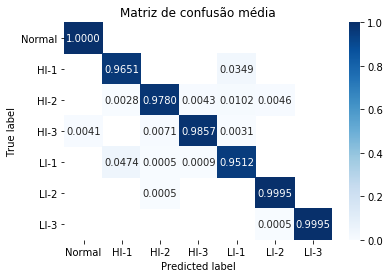

In [4]:
confusion_matrix_mean = np.mean(confusion_matrices, axis=0)

sns.heatmap(
    data=confusion_matrix_mean,
    cmap='Blues',
    vmin=0,
    vmax=1,
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_mean == 0,
    xticklabels=TARGET_LABELS,
    yticklabels=TARGET_LABELS
    ).set(
        title='Matriz de confusão média',
        xlabel='Predicted label',
        ylabel='True label')

confusion_matrix_mean

## Acurácias gerais

count    30.000000
mean      0.982209
std       0.005959
min       0.967245
25%       0.978805
50%       0.982659
75%       0.986031
max       0.992293
Name: Acurácia, dtype: float64


Acurácia
0.978805
0.976879
0.984586
0.988439
0.982659
0.992293
0.974952
0.980732
0.982659
0.990366


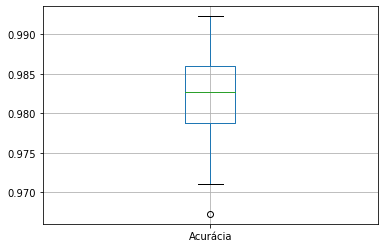

In [5]:
acc_s = pd.Series(data=acc_scores, name='Acurácia')

acc_s.to_frame().boxplot()

print(acc_s.describe())

acc_s.to_frame().style.hide_index().background_gradient(cmap='Blues')

## Acurácias e distribuição de amostras por frequência

In [6]:
freq_df = pd.concat(freq_scores_df, ignore_index=True)

acc_columns = [col for col in freq_df.columns if 'acc' in col]
sup_columns = [col for col in freq_df.columns if 'support' in col]

freq_accs = freq_df[acc_columns]
freq_sups = freq_df[sup_columns]

freq_accs.style.hide_index()

freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
0.984375,1.000000,0.950000,1.000000,0.987013,0.948718,0.984375
0.975904,1.000000,0.945946,0.984375,0.984375,0.987179,0.964706
1.000000,1.000000,0.925000,1.000000,1.000000,0.975309,1.000000
1.000000,1.000000,0.945205,1.000000,1.000000,0.986301,0.984615
0.960526,1.000000,1.000000,0.988095,0.985915,0.958904,0.985915
0.986667,1.000000,1.000000,1.000000,1.000000,0.986667,0.971429
0.986111,0.986486,0.951807,1.000000,1.000000,0.945946,0.960000
0.969697,0.962500,0.961039,1.000000,1.000000,0.989130,0.987500
1.000000,1.000000,0.960526,1.000000,1.000000,0.963855,0.955224
0.985714,1.000000,0.963636,1.000000,1.000000,0.989011,0.986301


,freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.983755,0.995067,0.953591,0.996750,0.993019,0.979429,0.975554
std,0.014004,0.010896,0.022192,0.006032,0.008028,0.015024,0.019499
min,0.948052,0.962500,0.913043,0.984375,0.972222,0.945946,0.898551
25%,0.974239,1.000000,0.938200,1.000000,0.986103,0.974269,0.970026
50%,0.986013,1.000000,0.954164,1.000000,1.000000,0.985458,0.975154
75%,0.996835,1.000000,0.962987,1.000000,1.000000,0.988095,0.987616
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


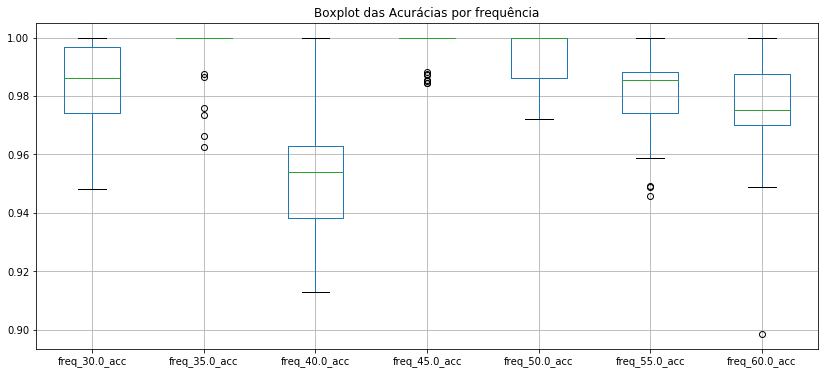

In [7]:
freq_accs.boxplot(figsize=(14, 6)).set(title='Boxplot das Acurácias por frequência')

freq_accs.describe()

In [8]:
freq_sups.style.hide_index()

freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
64,83,80,73,77,78,64
83,71,74,64,64,78,85
69,72,80,81,63,81,73
78,84,73,70,76,73,65
76,69,75,84,71,73,71
75,72,88,73,66,75,70
72,74,83,75,66,74,75
66,80,77,64,60,92,80
69,68,76,87,69,83,67
70,73,55,82,75,91,73


,freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,72.100000,75.200000,75.300000,72.800000,69.633333,79.733333,74.233333
std,5.640677,6.008041,8.284385,7.884511,6.646147,6.124757,6.621196
min,61.000000,63.000000,55.000000,52.000000,57.000000,65.000000,63.000000
25%,69.000000,71.250000,69.250000,66.250000,65.000000,76.250000,69.000000
50%,72.000000,74.500000,74.500000,73.000000,69.000000,81.000000,74.500000
75%,76.000000,79.750000,80.000000,78.000000,75.000000,83.000000,80.000000
max,85.000000,89.000000,91.000000,87.000000,83.000000,92.000000,85.000000


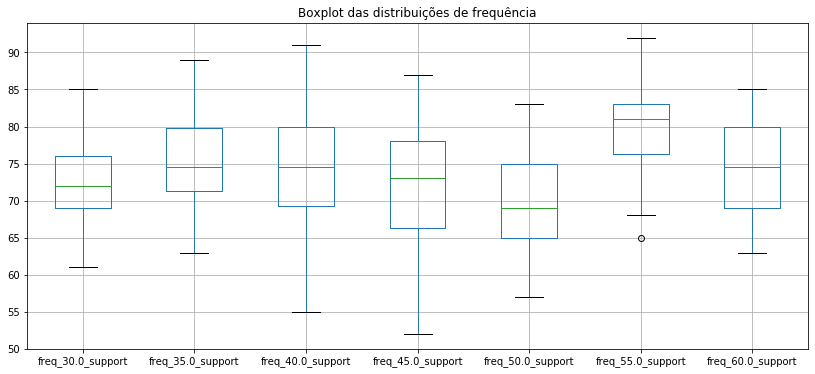

In [9]:
freq_sups.boxplot(figsize=(14, 6)).set(title='Boxplot das distribuições de frequência')

freq_sups.describe()